## **IMPORT ALL THE REQUIRED LIBRARIES**

---
*   **Pandas** to import data into a data frame and manipulate the data.
*   **Seaborn** and **matplotlib** to visualise the data and perform analysis.
*   **sklearn** to fit data into different models.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## **IMPORT DATA**

---

Import the csv data provided into pandas dataframe and check first 10 rows.

In [3]:
cwk_data = pd.read_csv('cwk_data_lixch37.csv')

cwk_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,50,services,married,primary,no,-15,no,yes,unknown,2,71,1,-1,0,unknown,no
1,33,blue-collar,married,primary,no,41,yes,no,cellular,13,173,1,-1,0,unknown,no
2,32,management,single,tertiary,no,1493,yes,no,unknown,28,65,11,-1,0,unknown,no
3,47,management,single,tertiary,no,86,no,no,cellular,5,253,1,97,4,success,yes
4,37,services,divorced,secondary,no,398,yes,yes,unknown,5,214,2,-1,0,unknown,no
5,30,technician,divorced,secondary,no,0,no,no,cellular,21,101,1,-1,0,unknown,no
6,52,management,married,tertiary,no,1111,no,no,unknown,5,17,1,-1,0,unknown,no
7,34,blue-collar,married,secondary,no,205,yes,yes,cellular,7,309,1,-1,0,unknown,no
8,34,technician,divorced,secondary,no,136,yes,no,cellular,8,136,2,-1,0,unknown,no
9,34,self-employed,married,primary,no,7468,yes,yes,cellular,30,383,1,-1,0,unknown,yes


## **ENCODING AND CLEANING**

---
The following code just encodes and cleans the outliers as already shown in summarization and exploratory data analysis sections.

In [4]:
#Encoding
from sklearn.preprocessing import OrdinalEncoder

encoded_data = cwk_data.copy()
ord_enc = OrdinalEncoder(dtype=int)
encoded_data[["job","marital","education","default","housing","loan","contact","poutcome","y"]] = ord_enc.fit_transform(cwk_data[["job","marital","education","default","housing","loan","contact","poutcome","y"]])
encoded_data.head(10)

#Removing outliers
encoded_data = encoded_data[encoded_data.balance < 5000]
encoded_data = encoded_data[encoded_data.campaign < 30]
encoded_data = encoded_data[encoded_data.pdays < 600]
encoded_data = encoded_data[encoded_data.previous < 20]

## **INPUT AND OUTPUT FEATURES**

---
Now we can split the data into input and output features to fit into models. We will also exclude duration feature from the input variable since duration cannot be known before contacting a person.

In [5]:
X = encoded_data.loc[:, encoded_data.columns != 'y']
y = encoded_data[['y']]

X = X.loc[:, X.columns != 'duration']

## **LOGISTIC REGRESSION**

---
Logistic regression is one of the most simplest and easy to implement classifying models. It usually doesn't overfit the data. It is fast and efficient, making it suitable for large data sets.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The score for Logisitic regressor is : 0.7985649747541855


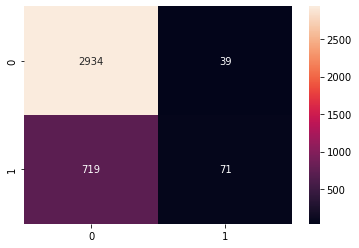

In [6]:
#Initialize classifier from sklearn
log_reg_clf = linear_model.LogisticRegression(solver='lbfgs', max_iter=2000)

#Fit the data
log_reg_model = log_reg_clf.fit(X,y)

#Print accuracy
print("The score for Logisitic regressor is : " + str(log_reg_model.score(X,y)))

#Predict on same data (To check confusion matrix only)
y_pred = log_reg_model.predict(X);

#Plot the confusion matrix
ax= plt.subplot()
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='g', ax=ax)
plt.show()
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['no', 'yes']); ax.yaxis.set_ticklabels(['no', 'yes']);


## **RANDOM FOREST**

---
Random forest algorithm can be used both as a classifier and a regressor. It can handle multidimensional data easily and it is fast at both fitting large datasets and predicting them as well.

<ipython-input-7-e3835dbbde75>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model = random_forest_classifier.fit(X,y)


The score for Random forest is : 0.8312516609088493


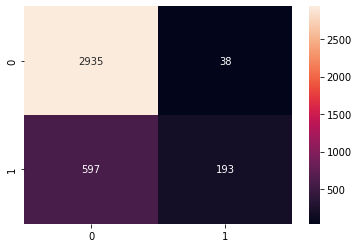

In [7]:
#Initialize classifier from sklearn
random_forest_classifier = RandomForestClassifier(max_depth=5,random_state=0)

#Fit the data
random_forest_model = random_forest_classifier.fit(X,y)

#Print accuracy
print("The score for Random forest is : " + str(random_forest_model.score(X,y)))

#Predict on same data (To check confusion matrix only)
y_pred_rf = random_forest_model.predict(X);

#Plot the confusion matrix
ax= plt.subplot()
sns.heatmap(confusion_matrix(y, y_pred_rf), annot=True, fmt='g', ax=ax)
plt.show()
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['no', 'yes']); ax.yaxis.set_ticklabels(['no', 'yes']);


## **kNN CLASSIFIER**

---
K-nearest neighbors (KNN) is another simple and popular classification algorithm. It simply calculates the distance of the data point to its nearest neighbours and predicts the output.

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The score for kNN classifier is : 0.8320488971565241


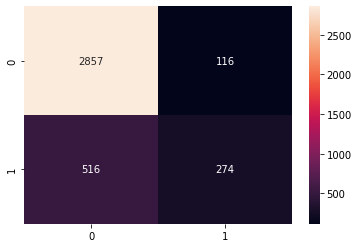

In [8]:
#Initialize classifier from sklearn
knn_classifier = KNeighborsClassifier(n_neighbors=5)

#Fit the data
knn_model = knn_classifier.fit(X,y);

#Print accuracy
print("The score for kNN classifier is : " + str(knn_model.score(X,y)))

#Predict on same data (To check confusion matrix only)
y_pred_knn = knn_model.predict(X);

#Plot the confusion matrix
ax= plt.subplot()
sns.heatmap(confusion_matrix(y, y_pred_knn), annot=True, fmt='g', ax=ax)
plt.show()
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['no', 'yes']); ax.yaxis.set_ticklabels(['no', 'yes']);


## **SAVE THE MODEL**

---
We can use pickle to save the model so that it can be used for prediction. Since random forest is providing both good accuracy and a good recall value, we will choose that model to predict new data.

In [14]:
#Import pickle
import pickle

pickle.dump(random_forest_model, open('model.pkl', 'wb'))